In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [11]:
import numpy as np
import os
import imutils
import cv2
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import pickle
from skimage.transform import resize
import time

from PIL import Image

In [12]:
people = ['F01','F02','F03','F04','F05','M01','M02','M03','M04','M05']
data_types = ['words','phrases']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']
phrases = ['Stop navigation', 'Excuse me', 'I am sorry', 'Thank you', 'Good bye', 'I love this game', 'Nice to meet you', 'You are welcome', 'How are you?', 'Have a good time']

In [13]:
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

In [14]:
MAX_WIDTH = 100
MAX_HEIGHT = 100

SEQUENCE_LENGTH = 28

VALIDATION_SPLIT = ['09']
TEST_SPLIT = ['05']

In [15]:
print(os.getcwd()) # print working directory

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [16]:
sequence = []
for img_name in os.listdir('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrase dataset/F01/phrases/03/01'):
    if not os.path.isdir(img_name):
        path = os.path.join('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrase dataset/F01/phrases/03/01', img_name)
        image = imageio.imread(path)
        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
        image = 255 * image

        image = image.astype(np.uint8)
        sequence.append(image)
pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]
sequence.extend(pad_array * (SEQUENCE_LENGTH - len(sequence)))
sequence = np.array(sequence)

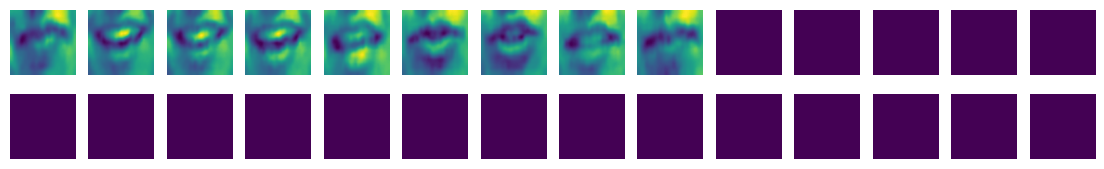

In [17]:
def display_images(image_list):
    fig, axes = plt.subplots(2, 14, figsize=(14, 2))
    for i, img in enumerate(image_list):
        row, col = divmod(i, 14)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')  # Hide axes
    plt.show()

display_images(sequence)

In [18]:
t1 = time.time()
for person_id in os.listdir('Dataset/word dataset'):
    f_path = os.path.join('Dataset/word dataset', person_id)
    if os.path.isdir(f_path):
        tx1 = time.time()
        for data_type in os.listdir(f_path):
            l_path = os.path.join(f_path, data_type)
            if os.path.isdir(l_path):
                for word_index, word in enumerate(os.listdir(l_path)):
                    w_path = os.path.join(l_path, word)
                    if os.path.isdir(w_path):
                      print(word_index+1)
                      # print(word.split('0')[1])
        break

1
2
3
4
5
6
7
8
9
10


In [19]:
t1 = time.time()
for person_id in os.listdir('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/word dataset'):
    f_path = os.path.join('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/word dataset', person_id)
    if os.path.isdir(f_path):
        tx1 = time.time()
        for data_type in os.listdir(f_path):
            l_path = os.path.join(f_path, data_type)
            if os.path.isdir(l_path):
                for word_index, word in enumerate(os.listdir(l_path)):
                    w_path = os.path.join(l_path, word)
                    if os.path.isdir(w_path):
                        for iteration in os.listdir(w_path):
                            p_path = os.path.join(w_path, iteration)
                            if os.path.isdir(p_path):
                                sequence = []
                                for img_name in os.listdir(p_path):
                                    if not os.path.isdir(img_name):
                                        path = os.path.join(p_path, img_name)
                                        image = imageio.imread(path)
                                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                                        image = 255 * image

                                        # Convert to integer data type pixels.
                                        image = image.astype(np.uint8)
                                        sequence.append(image)
                                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]
                                sequence.extend(pad_array * (SEQUENCE_LENGTH - len(sequence)))
                                sequence = np.array(sequence)

                                if  iteration in TEST_SPLIT:
                                    X_test.append(sequence)
                                    y_test.append(word_index+1)
                                elif iteration in VALIDATION_SPLIT:
                                    X_val.append(sequence)
                                    y_val.append(word_index+1)
                                else:
                                    X_train.append(sequence)
                                    y_train.append(word_index+1)
        tx2 = time.time()
        print(f'Splitted lip images for person {person_id}. Time taken : {tx2 - tx1} sec')

t2 = time.time()
print(f"Total time taken : {t2 - t1} sec")

Splitted lip images for person F01. Time taken : 14.341428995132446 sec
Splitted lip images for person F02. Time taken : 13.734199523925781 sec
Splitted lip images for person M01. Time taken : 15.650159120559692 sec
Splitted lip images for person M02. Time taken : 18.477381944656372 sec
Splitted lip images for person F03. Time taken : 21.036208391189575 sec
Splitted lip images for person F04. Time taken : 19.144476413726807 sec
Splitted lip images for person F05. Time taken : 18.958949089050293 sec
Splitted lip images for person F06. Time taken : 18.015883684158325 sec
Splitted lip images for person F07. Time taken : 12.626848459243774 sec
Splitted lip images for person F08. Time taken : 15.322041034698486 sec
Splitted lip images for person M03. Time taken : 16.553295373916626 sec
Splitted lip images for person M04. Time taken : 11.768911361694336 sec
Splitted lip images for person M05. Time taken : 13.32328462600708 sec
Total time taken : 208.97966957092285 sec


In [20]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1040, 28, 100, 100)
(130, 28, 100, 100)
(130, 28, 100, 100)


In [21]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1040,)
(130,)
(130,)


In [22]:
def min_max_normalize(x):
    x_min = x.min(axis=(2, 3), keepdims=True)
    x_max = x.max(axis=(2, 3), keepdims=True)
    x = (x - x_min)/(x_max - x_min)
    x = np.nan_to_num(x) # handling nan values
    return x

# Normalizing the data.
X_train = min_max_normalize(X_train)
X_val = min_max_normalize(X_val)
X_test = min_max_normalize(X_test)

<ipython-input-22-0a9a1795bba2>:4: RuntimeWarning: invalid value encountered in divide
  x = (x - x_min)/(x_max - x_min)


In [23]:
from keras.utils import to_categorical

# One hot encoding for the labels.
y_train = to_categorical(y_train, 11)
y_test = to_categorical(y_test, 11)
y_val = to_categorical(y_val, 11)

In [24]:
from sklearn.utils import shuffle

# Shuffling the data.
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)

In [25]:
# words
import pickle

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'wb') as f:
  pickle.dump(X_train, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'wb') as f:
  pickle.dump(y_train, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'wb') as f:
  pickle.dump(X_test, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'wb') as f:
  pickle.dump(y_test, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'wb') as f:
  pickle.dump(X_val, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'wb') as f:
  pickle.dump(y_val, f)

In [9]:
# # phrases
# import pickle

# with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/train/X_train.pkl', 'wb') as f:
#   pickle.dump(X_train, f)

# with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/train/y_train.pkl', 'wb') as f:
#   pickle.dump(y_train, f)

# with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/test/X_test.pkl', 'wb') as f:
#   pickle.dump(X_test, f)

# with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/test/y_test.pkl', 'wb') as f:
#   pickle.dump(y_test, f)

# with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/val/X_val.pkl', 'wb') as f:
#   pickle.dump(X_val, f)

# with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/val/y_val.pkl', 'wb') as f:
#   pickle.dump(y_val, f)